In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D,Dropout,Dense,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
dataset=r'C:\Users\Ranjith ch\Mask detector\dataset'
image_path=list(paths.list_images(dataset))

In [4]:
image_path

['C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_aidai_0014.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_aidai_0029.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_aidai_0043.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_aidai_0074.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_aidai_0084.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_aidai_0136.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_anhu_0004.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_anhu_0020.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_anhu_0025.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_anhu_0027.jpg',
 'C:\\Users\\Ranjith ch\\Mask detector\\dataset\\without_mask\\0_0_anhu_0056.jpg',
 'C:\\User

In [5]:
data=[]
labels=[]

for i in image_path:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

C:\Users\Ranjith ch\anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [6]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [7]:
data

[array([[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],
 
        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.75686276, -0.7882353 , -0.67058825]],
 
        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.8666667 , -0.88235295, -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],
 
        ...,
 
        [[ 0.3803922 , -0.9607843 

In [8]:
image

array([[[-0.5058824 ,  0.4039216 , -0.16862744],
        [-0.5058824 ,  0.4039216 , -0.16862744],
        [-0.5764706 ,  0.22352946, -0.29411763],
        ...,
        [-0.54509807, -0.4588235 , -0.5686275 ],
        [-0.47450978, -0.38823527, -0.5137255 ],
        [-0.47450978, -0.38823527, -0.5137255 ]],

       [[-0.5058824 ,  0.4039216 , -0.16862744],
        [-0.5058824 ,  0.4039216 , -0.16862744],
        [-0.5764706 ,  0.22352946, -0.29411763],
        ...,
        [-0.54509807, -0.4588235 , -0.5686275 ],
        [-0.47450978, -0.38823527, -0.5137255 ],
        [-0.47450978, -0.38823527, -0.5137255 ]],

       [[-0.5137255 ,  0.2941177 , -0.24705881],
        [-0.5137255 ,  0.2941177 , -0.24705881],
        [-0.6392157 ,  0.06666672, -0.41176468],
        ...,
        [-0.32549018, -0.26274508, -0.3490196 ],
        [-0.1607843 , -0.09803921, -0.18431371],
        [-0.1607843 , -0.09803921, -0.18431371]],

       ...,

       [[ 0.02745104, -0.12156862, -0.17647058],
        [ 0

In [9]:
data=np.array(data,dtype='float32')
labels = np.array(labels)

In [10]:
data

array([[[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],

        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.7647059 , -0.79607844, -0.6784314 ],
         [-0.75686276, -0.7882353 , -0.67058825]],

        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.8666667 , -0.88235295, -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],

        ...,

        [[ 0.3803922 , -0.9607843 , -0

In [11]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [12]:
data.shape

(3833, 224, 224, 3)

In [13]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [14]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [15]:
train_X.shape

(3066, 224, 224, 3)

In [16]:
train_Y.shape

(3066, 2)

In [17]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [18]:
aug

In [19]:
baseModel=VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [20]:
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [21]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)
model=Model(inputs=baseModel.input,outputs=headModel)

In [22]:
for layer in baseModel.layers:
    layer.trainable=False

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
learning_rate=0.001
Epochs=20
BS=12

In [25]:
opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
A=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)





Epoch 1/20
255/255 [==============================] - 327s 1s/step - loss: 0.2876 - accuracy: 0.8802 - val_loss: 0.1279 - val_accuracy: 0.9557
Epoch 2/20
255/255 [==============================] - 331s 1s/step - loss: 0.1626 - accuracy: 0.9378 - val_loss: 0.0968 - val_accuracy: 0.9700
Epoch 3/20
255/255 [==============================] - 335s 1s/step - loss: 0.1212 - accuracy: 0.9561 - val_loss: 0.0882 - val_accuracy: 0.9713
Epoch 4/20
255/255 [==============================] - 331s 1s/step - loss: 0.1096 - accuracy: 0.9620 - val_loss: 0.0826 - val_accuracy: 0.9726
Epoch 5/20
255/255 [==============================] - 327s 1s/step - loss: 0.1020 - accuracy: 0.9623 - val_loss: 0.0634 - val_accuracy: 0.9713
Epoch 6/20
255/255 [==============================] - 327s 1s/step - loss: 0.0979 - accuracy: 0.9646 - val_loss: 0.0779 - val_accuracy: 0.9726
Epoch 7/20
255/255 [==============================] - 327s 1s/step - loss: 0.0909 - accuracy: 0.9689 - val_loss: 0.0605 - val_accuracy: 0.9752

255/255 [==============================] - 348s 1s/step - loss: 0.0686 - accuracy: 0.9715 - val_loss: 0.0406 - val_accuracy: 0.9844
Epoch 18/20
255/255 [==============================] - 350s 1s/step - loss: 0.0596 - accuracy: 0.9790 - val_loss: 0.0419 - val_accuracy: 0.9844
Epoch 19/20
255/255 [==============================] - 351s 1s/step - loss: 0.0539 - accuracy: 0.9790 - val_loss: 0.0642 - val_accuracy: 0.9778
Epoch 20/20
255/255 [==============================] - 348s 1s/step - loss: 0.0657 - accuracy: 0.9751 - val_loss: 0.0412 - val_accuracy: 0.9817


In [26]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.97      0.99      0.98       383
without_mask       0.99      0.97      0.98       384

    accuracy                           0.98       767
   macro avg       0.98      0.98      0.98       767
weighted avg       0.98      0.98      0.98       767



In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(test_Y.argmax(axis=1),predict)

0.9817470664928292

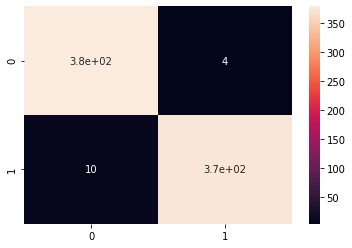

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_Y.argmax(axis=1), predict)
sns.heatmap(cm,annot=True)

In [29]:
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[379   4]
 [ 10 374]]
acc: 0.9817
sensitivity: 0.9896
specificity: 0.9740


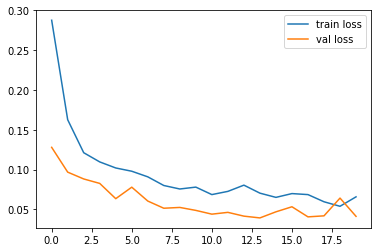

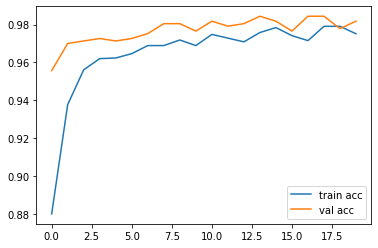

In [30]:
plt.plot(A.history['loss'], label='train loss')
plt.plot(A.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(A.history['accuracy'], label='train acc')
plt.plot(A.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

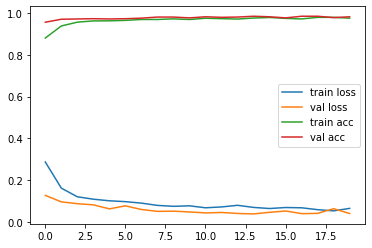

In [31]:
plt.plot(A.history['loss'], label='train loss')
plt.plot(A.history['val_loss'], label='val loss')
plt.plot(A.history['accuracy'], label='train acc')
plt.plot(A.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [32]:
model.save('VGG16.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: VGG16.model\assets
